In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### 1. Exploratory Data Analysis (EDA):

In [3]:
df = pd.read_excel("glass.xlsx",sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.isnull().sum().sum()

0

* the Data has no null values 

#### 2: Data Visualization:
#### 3: Data Preprocessing

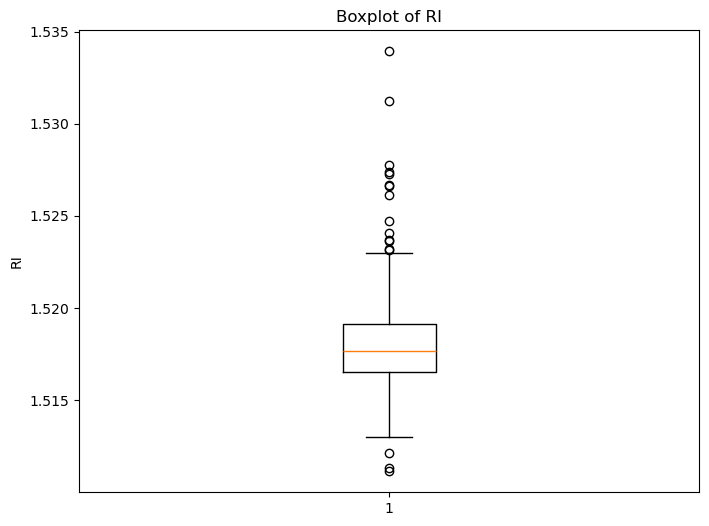

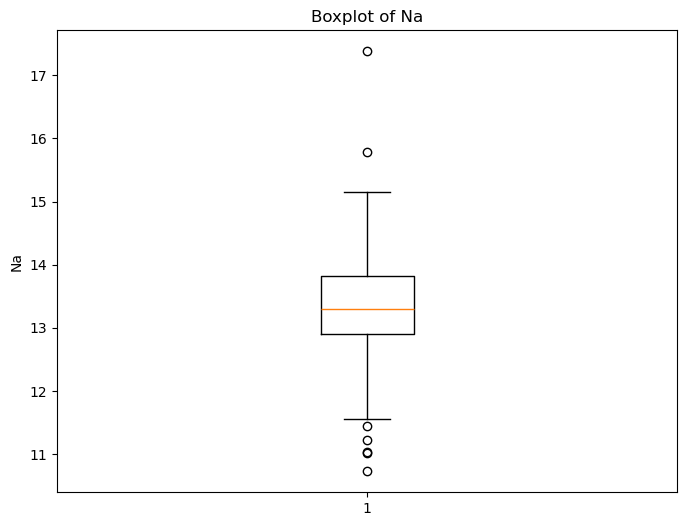

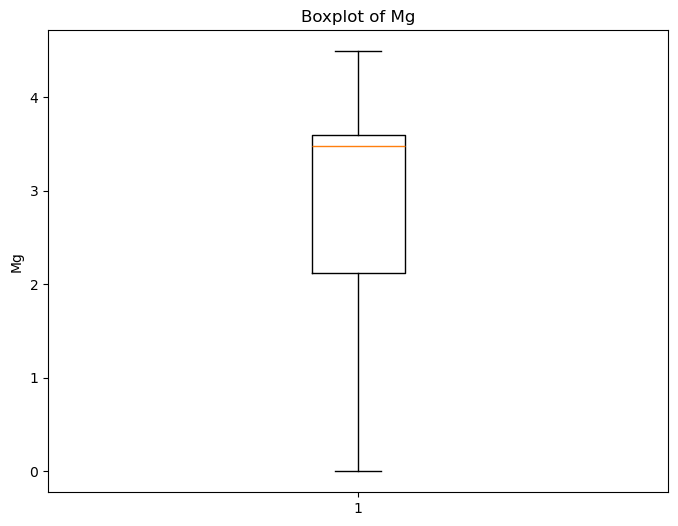

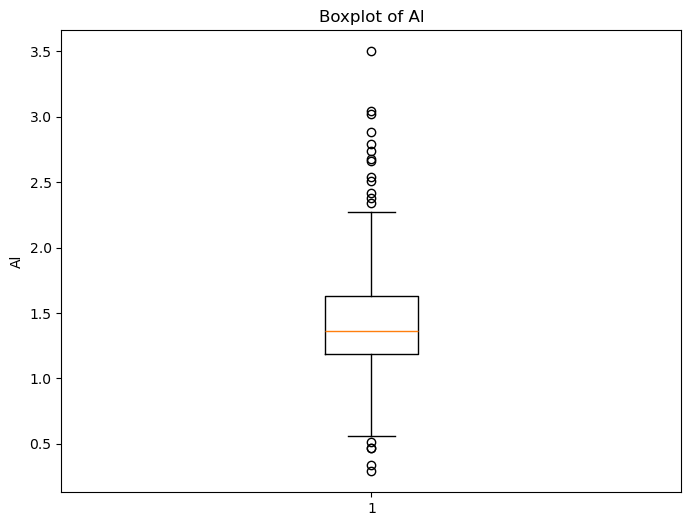

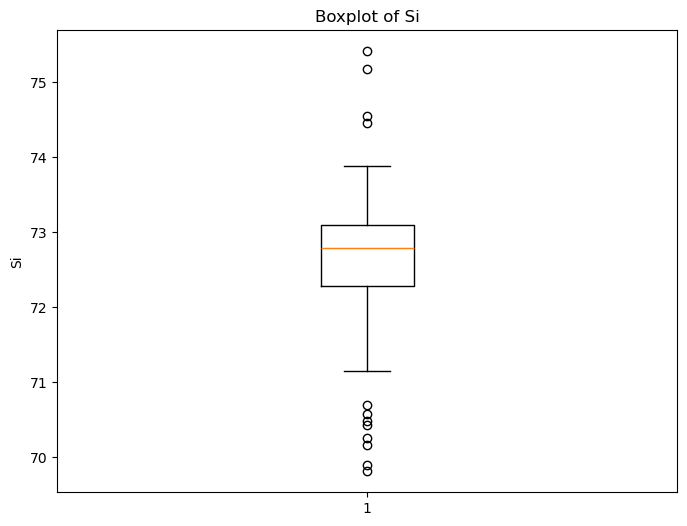

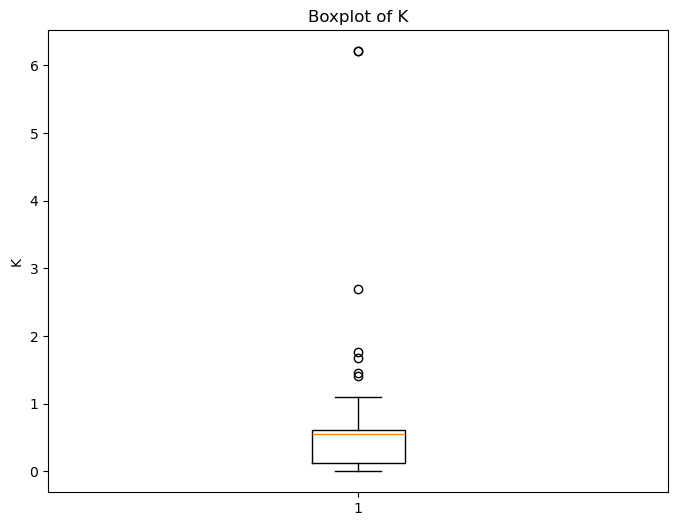

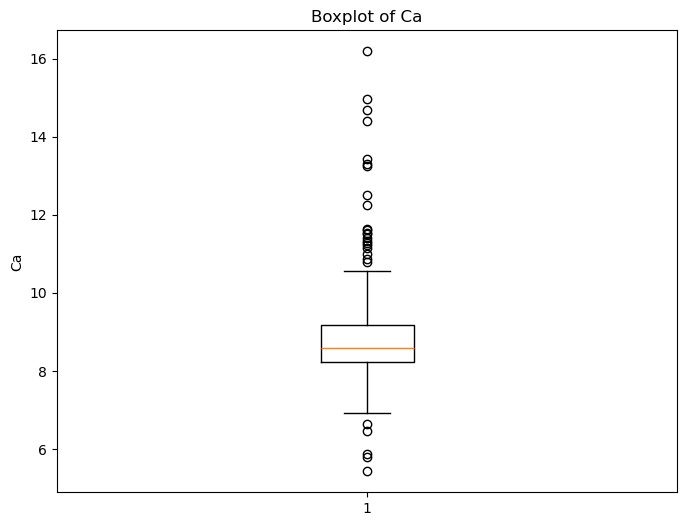

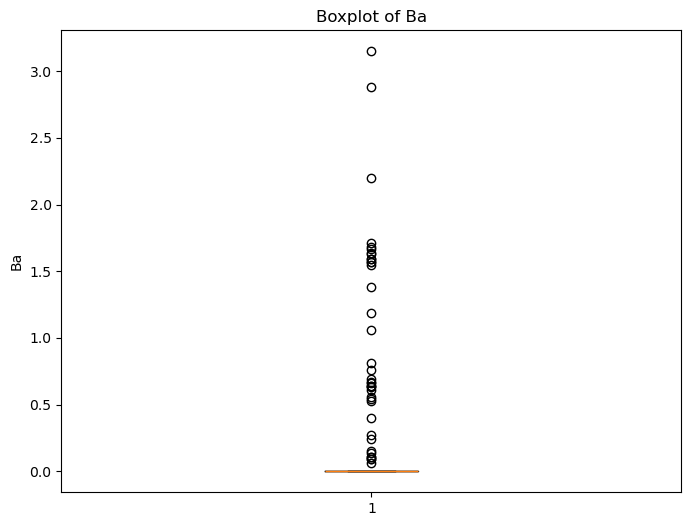

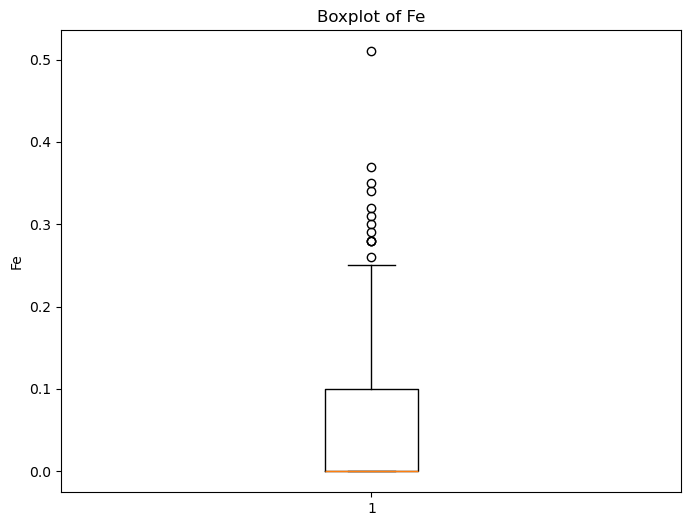

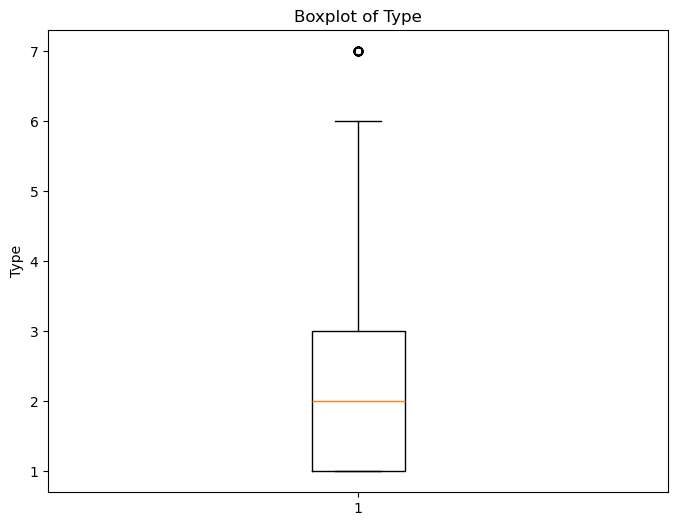

In [9]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

In [10]:
from sklearn.ensemble import IsolationForest

In [11]:
clf = IsolationForest(random_state= 10, contamination= 0.1)

In [12]:
clf.fit(df)

IsolationForest(contamination=0.1, random_state=10)

In [13]:
# predictions
y_pred_outliers = clf.predict(df)

In [14]:
y_pred_outliers
df['anamoly'] = y_pred_outliers

In [15]:
df_cleaned = df[df['anamoly'] == 1]

In [16]:
df_cleaned.drop('anamoly' , axis = 1, inplace = True)

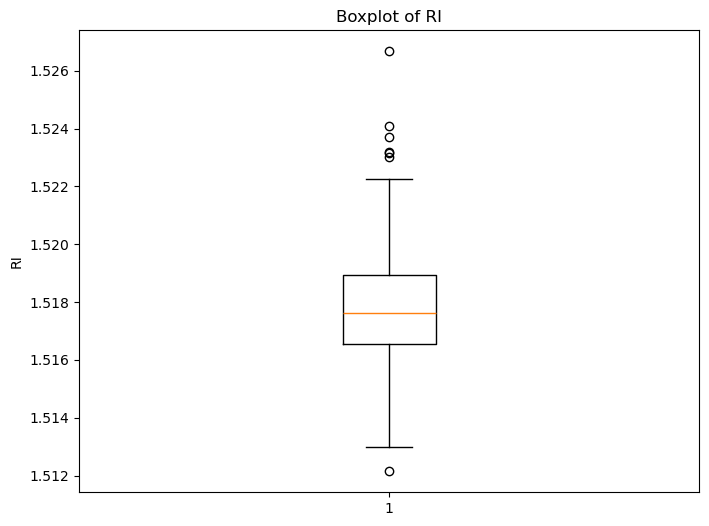

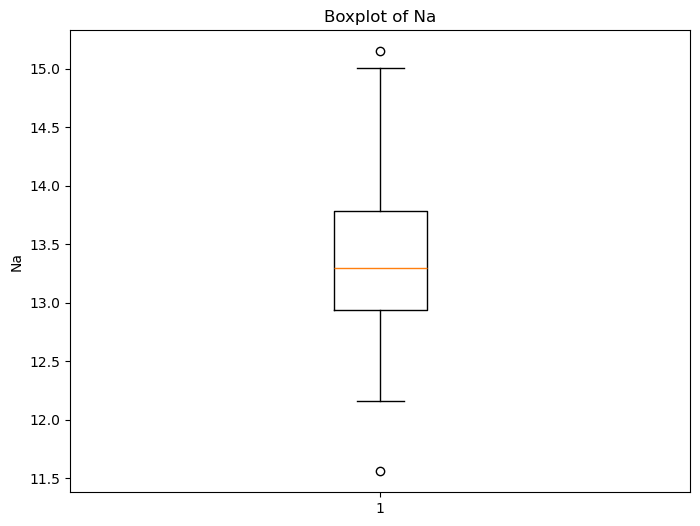

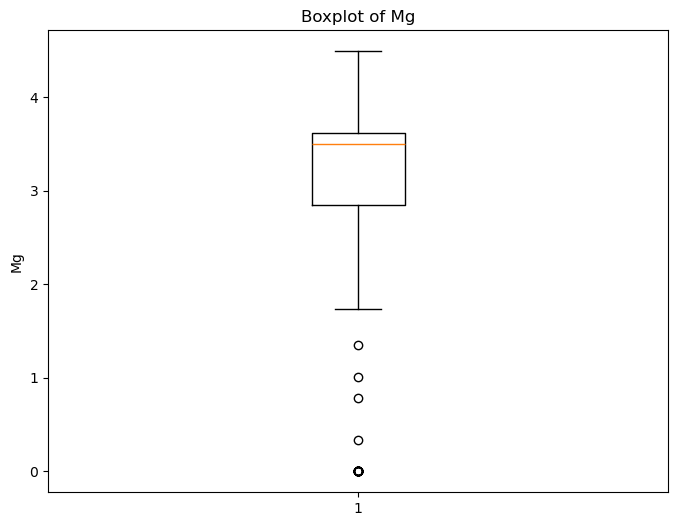

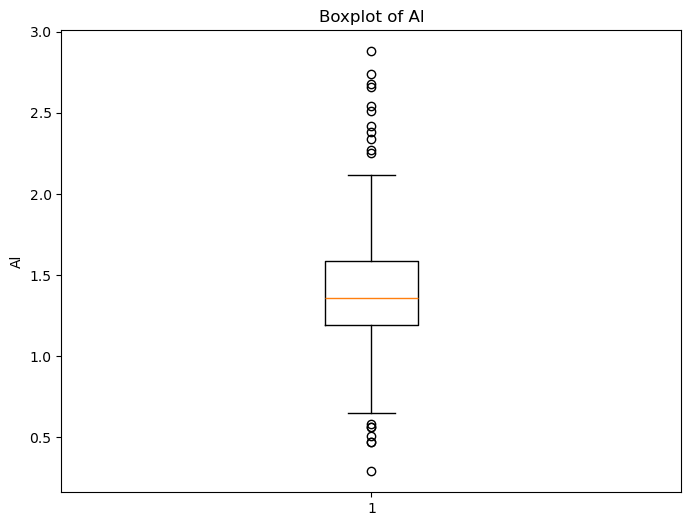

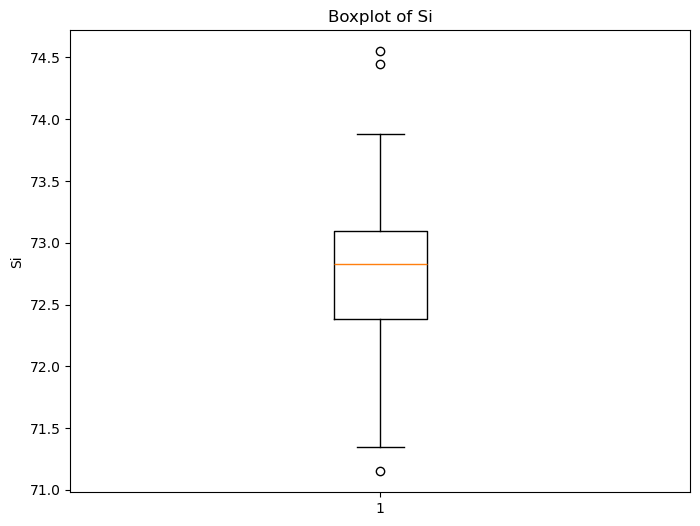

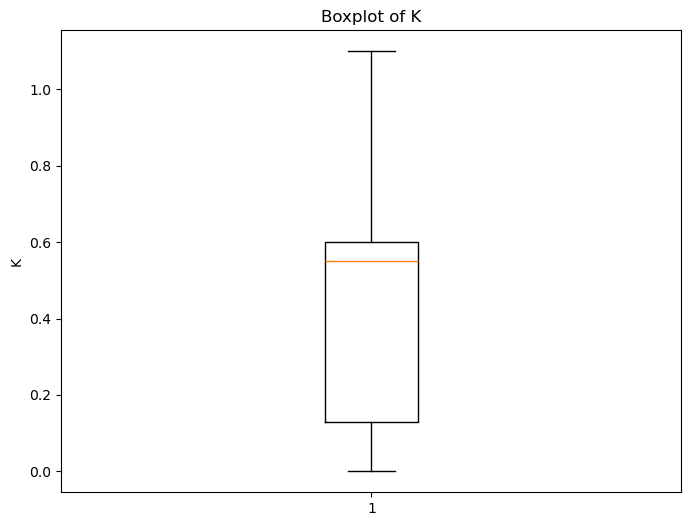

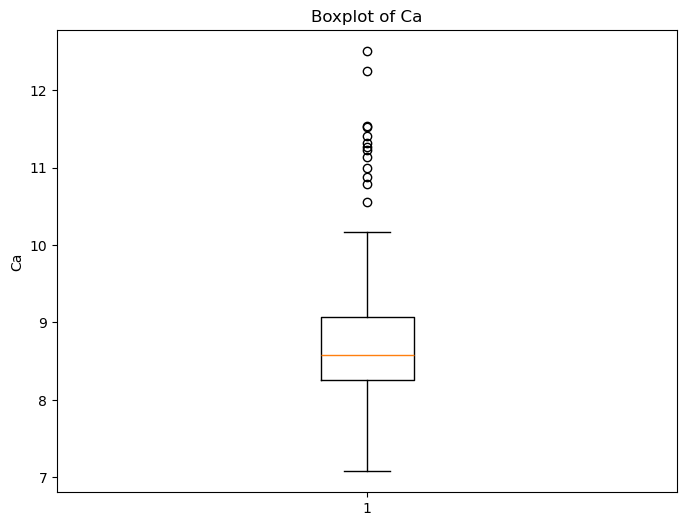

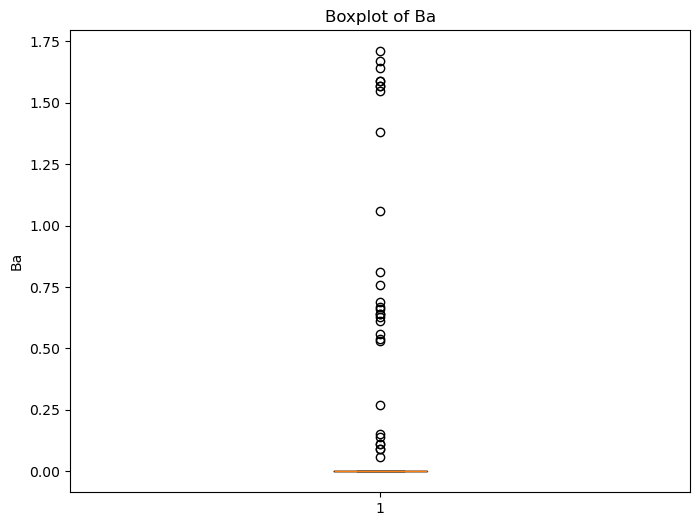

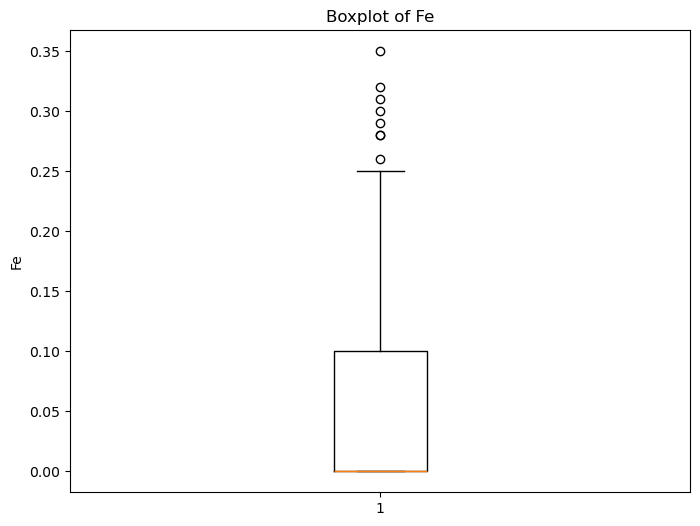

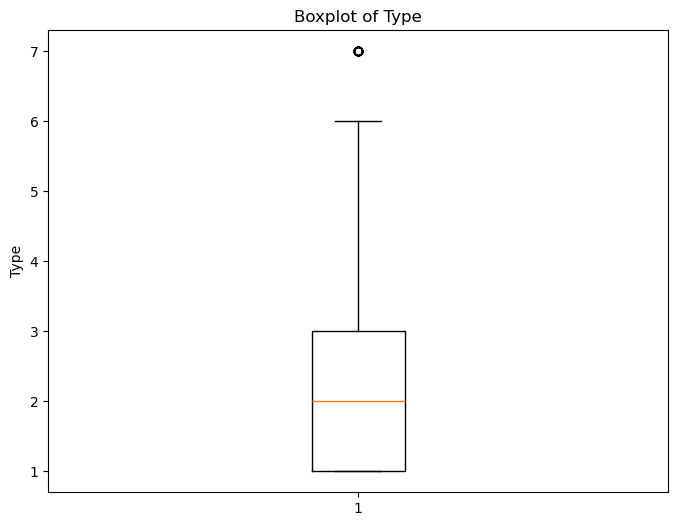

In [17]:
for column in df_cleaned.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

<Figure size 2000x1500 with 0 Axes>

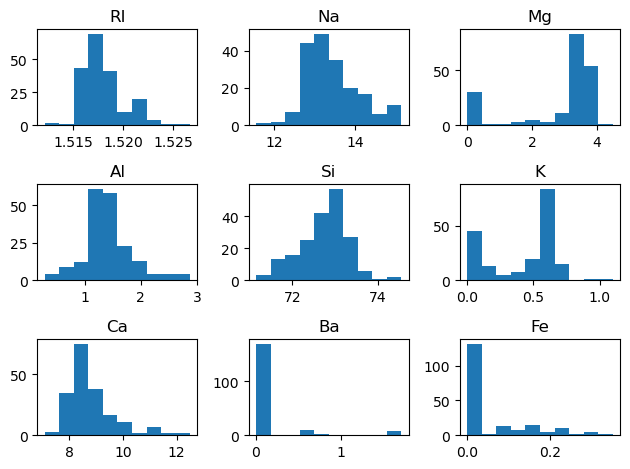

In [18]:
plt.figure(figsize = (20,15))
df_cleaned[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']].hist(grid = False)
plt.tight_layout()

In [19]:
df_cleaned.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.073906,0.061582,-0.526612,-0.614563,-0.326870,0.674537,-0.169670,-0.003690,-0.155856
Na,0.073906,1.000000,-0.542047,0.271564,-0.192741,-0.740548,0.096162,0.561307,-0.241579,0.585150
Mg,0.061582,-0.542047,1.000000,-0.605364,-0.388711,0.541070,-0.468596,-0.664034,0.157249,-0.840621
Al,-0.526612,0.271564,-0.605364,1.000000,0.347360,-0.071770,-0.180377,0.530923,-0.137561,0.654407
Si,-0.614563,-0.192741,-0.388711,0.347360,1.000000,0.099078,-0.201700,0.245818,-0.005508,0.303549
K,-0.326870,-0.740548,0.541070,-0.071770,0.099078,1.000000,-0.418805,-0.506882,0.159795,-0.563365
Ca,0.674537,0.096162,-0.468596,-0.180377,-0.201700,-0.418805,1.000000,-0.059964,-0.016180,0.230599
Ba,-0.169670,0.561307,-0.664034,0.530923,0.245818,-0.506882,-0.059964,1.000000,-0.127818,0.685695
Fe,-0.003690,-0.241579,0.157249,-0.137561,-0.005508,0.159795,-0.016180,-0.127818,1.000000,-0.206962
Type,-0.155856,0.585150,-0.840621,0.654407,0.303549,-0.563365,0.230599,0.685695,-0.206962,1.000000


In [20]:
X = df_cleaned.drop(columns='Type')  
y = df_cleaned['Type']  

In [21]:
# Apply feature scaling techniques standardization to ensure that all features are on a similar scale.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transformed_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)




In [22]:
transformed_X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.402325,0.325924,1.221276,-0.739437,-1.729053,-1.398885,-0.082003,-0.340799,-0.60481
1,-0.196470,0.706103,0.550263,-0.135103,-0.010833,0.238359,-1.113703,-0.340799,-0.60481
2,-0.868904,0.158645,0.512566,0.283281,0.459417,-0.112479,-1.169774,-0.340799,-0.60481
3,-0.172958,-0.327983,0.618118,-0.297809,-0.227871,0.589196,-0.676352,-0.340799,-0.60481
4,-0.285814,-0.236741,0.565342,-0.414027,0.622195,0.511232,-0.844564,-0.340799,-0.60481
...,...,...,...,...,...,...,...,...,...
187,-0.845392,1.086282,-2.163944,3.397924,-0.227871,-1.320921,0.400204,2.538377,-0.60481
188,-0.553847,2.272440,-2.163944,1.329243,0.586022,-1.632776,-0.474498,3.977965,-0.60481
189,1.233041,1.420839,-2.163944,1.398974,1.237137,-1.632776,-0.429641,4.113775,-0.60481
190,-0.713727,1.451254,-2.163944,1.213025,1.580781,-1.632776,-0.384785,3.923641,-0.60481


In [23]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

print(classification_report(y_test, y_pred))


Accuracy: 0.6923076923076923
Precision: 0.6272893772893773
Recall: 0.6923076923076923
F1 Score: 0.6457405842021225
              precision    recall  f1-score   support

           1       0.65      0.87      0.74        15
           2       0.64      0.75      0.69        12
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         3

    accuracy                           0.69        39
   macro avg       0.72      0.63      0.65        39
weighted avg       0.63      0.69      0.65        39



#### doing hypertuning to improve the performance

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')

best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8111827956989247


In [28]:
new_model = RandomForestClassifier( random_state= 42 , min_samples_leaf= 1 , min_samples_split= 2, n_estimators = 100)
new_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = new_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


print(classification_report(y_test, y_pred))

Accuracy: 0.6923076923076923
Precision: 0.6272893772893773
Recall: 0.6923076923076923
F1 Score: 0.6457405842021225
              precision    recall  f1-score   support

           1       0.65      0.87      0.74        15
           2       0.64      0.75      0.69        12
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         3

    accuracy                           0.69        39
   macro avg       0.72      0.63      0.65        39
weighted avg       0.63      0.69      0.65        39



In [30]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print("Gradient Boosting Performance:")
print(f'Accuracy: {accuracy_gb}')
print(f'Precision: {precision_gb}')
print(f'Recall: {recall_gb}')
print(f'F1 Score: {f1_gb}')
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Performance:
Accuracy: 0.6923076923076923
Precision: 0.7601809954751132
Recall: 0.6923076923076923
F1 Score: 0.6733127026230474
              precision    recall  f1-score   support

           1       0.71      0.80      0.75        15
           2       0.59      0.83      0.69        12
           3       1.00      0.20      0.33         5
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.67      0.80         3

    accuracy                           0.69        39
   macro avg       0.88      0.58      0.65        39
weighted avg       0.76      0.69      0.67        39



In [31]:
# Print and compare the results
print("Random Forest (Bagging) Performance:")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

print("\nGradient Boosting Performance:")
print(f'Accuracy: {accuracy_gb}')
print(f'Precision: {precision_gb}')
print(f'Recall: {recall_gb}')
print(f'F1 Score: {f1_gb}')


Random Forest (Bagging) Performance:
Accuracy: 0.6923076923076923
Precision: 0.6272893772893773
Recall: 0.6923076923076923
F1 Score: 0.6457405842021225

Gradient Boosting Performance:
Accuracy: 0.6923076923076923
Precision: 0.7601809954751132
Recall: 0.6923076923076923
F1 Score: 0.6733127026230474


### Bagging vs. Boosting
#### Bagging:

* Independent Models: Trains multiple models independently on different random subsets of data.
* Reduces Variance: Combines predictions to reduce model variance and overfitting.
* Example: Random Forest.
    
#### Boosting:

* Sequential Models: Trains models sequentially, with each new model correcting errors from previous ones.
* Reduces Bias and Variance: Focuses on improving model performance by addressing errors.
* Example: Gradient Boosting, AdaBoost.

### Handling Imbalanced Data

* Oversampling: Add more instances of the minority class or create new synthetic examples to balance the dataset.
* Undersampling: Reduce the number of instances in the majority class to balance the classes.
* Class Weights: Adjust the model to pay more attention to the minority class by assigning it a higher weight.
* Evaluation Metrics: Use metrics like the Precision-Recall Curve and F1 Score to better assess the performance on imbalanced data.
* Ensemble Methods: Use models designed for imbalanced data, like Balanced Random Forest, to improve performance.